In [1]:
import tqdm
import numpy as np
import scipy.stats
import pandas as pd
import sklearn
import sklearn.datasets
from sklearn.feature_selection import mutual_info_regression
import sklearn.covariance
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import seaborn as sns
sns.set_style('ticks')
palette = sns.color_palette("RdBu_r", n_colors=25)
import plotly
plotly.offline.init_notebook_mode(connected=True)

import kliep
import knn

In [2]:
pre = [[   1,  0.5,    0],
       [ 0.5,    1, -0.5],
       [   0, -0.5,    1]]
diag = np.sqrt(np.diag(np.linalg.inv(pre)))
pre = pre * diag.reshape(-1, 1) * diag.reshape(1, -1)
cov = np.linalg.inv(pre)

In [ ]:
ns = [100, 1000, 10000]

In [ ]:
tmi = knn.cmi_gaussian(cov)[0][1]
methods = ['knn_4h', 'knn10']
errors1 = {method: {n: [] for n in ns} for method in methods}

for n in tqdm.tqdm(ns):
    for _ in range(100):
        X = scipy.stats.multivariate_normal(mean=[0, 0, 0], cov=cov).rvs(n)
        x = X[:, [1]]
        y = X[:, [0]]
        z = X[:, (np.arange(3) != 0) & (np.arange(3) != 1)]
        errors1['knn_4h'][n] += [abs(knn.cmi_4h(x, y, z, k=10) - tmi)]
        errors1['knn10'][n] += [abs(knn.cmi_knn(x, y, z, k=10) - tmi)]

 67%|██████▋   | 2/3 [00:36<00:11, 11.17s/it]

In [ ]:
tmi = knn.cmi_gaussian(cov)[0][2]
methods = ['knn_4h', 'knn10']
errors2 = {method: {n: [] for n in ns} for method in methods}

for n in tqdm.tqdm(ns):
    for _ in range(100):
        X = scipy.stats.multivariate_normal(mean=[0, 0, 0], cov=cov).rvs(n)
        x = X[:, [2]]
        y = X[:, [0]]
        z = X[:, (np.arange(3) != 0) & (np.arange(3) != 2)]
        errors2['knn_4h'][n] += [abs(knn.cmi_4h(x, y, z, k=10) - tmi)]
        errors2['knn10'][n] += [abs(knn.cmi_knn(x, y, z, k=10) - tmi)]

100%|██████████| 3/3 [1:12:53<00:00, 1308.98s/it]


In [18]:
methods = ['knn_4h', 'knn10']
errors3 = {method: {n: [] for n in ns} for method in methods}

for n in tqdm.tqdm(ns):
    for _ in range(100):
        cluster = np.arange(n)
        n1 = int(n / 3)
        n2 = 2 * int(n / 3) - n1
        cluster[cluster < n1] = 0
        cluster[(cluster >= n1) & (cluster < n2 + n1)] = 1
        cluster[cluster >= n2 + n1] = 2
        X1 = scipy.stats.multivariate_normal(mean=[-8, 0], cov=np.eye(2)).rvs(n1)
        X2 = scipy.stats.multivariate_normal(mean=[+8, 0], cov=np.eye(2)).rvs(n2)
        X3 = scipy.stats.multivariate_normal(mean=[ 0, 10], cov=np.eye(2)).rvs(n - n1 - n2)
        X = np.vstack([X1, X2, X3])
        X = np.hstack([X, cluster.reshape(-1, 1)])
        x = X[:, [1]]
        y = X[:, [2]]
        z = X[:, (np.arange(3) != 1) & (np.arange(3) != 2)]
        errors3['knn_4h'][n] += [abs(knn.cmi_4h(x, y, z + np.random.normal(0, 0.04, n), k=10))]
        errors3['knn10'][n] += [abs(knn.cmi_knn(x, y, z, k=10))]

 33%|███▎      | 1/3 [00:01<00:03,  1.62s/it]/home/ytakashina/workspace/density_ratio/knn.py:26: RuntimeWarning:

divide by zero encountered in log

/home/ytakashina/workspace/density_ratio/knn.py:41: RuntimeWarning:

invalid value encountered in double_scalars

 67%|██████▋   | 2/3 [23:56<07:11, 431.48s/it]

MemoryError: 

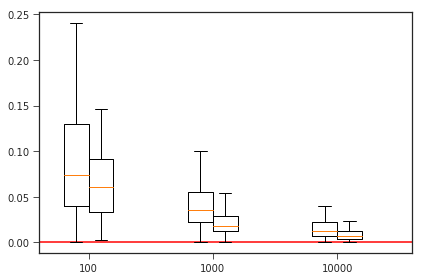

In [13]:
plt.boxplot(list(errors1['knn_4h'].values()), positions=np.arange(3)-0.1, widths=0.2, showfliers=False)
plt.boxplot(list(errors1['knn10'].values()), positions=np.arange(3)+0.1, widths=0.2, showfliers=False)
plt.xticks(np.arange(3), ns)
plt.tight_layout()
plt.hlines(0, -1, 9, color='red')
plt.savefig('output/box-gaussian-1.pdf', format='pdf')

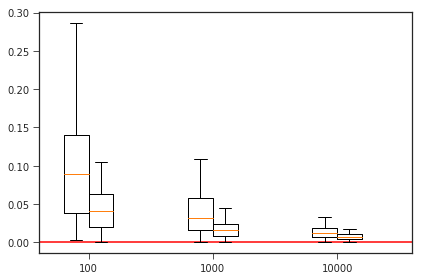

In [14]:
plt.boxplot(list(errors2['knn_4h'].values()), positions=np.arange(3)-0.1, widths=0.2, showfliers=False)
plt.boxplot(list(errors2['knn10'].values()), positions=np.arange(3)+0.1, widths=0.2, showfliers=False)
plt.xticks(np.arange(3), ns)
plt.tight_layout()
plt.hlines(0, -1, 9, color='red')
plt.savefig('output/box-gaussian-2.pdf', format='pdf')

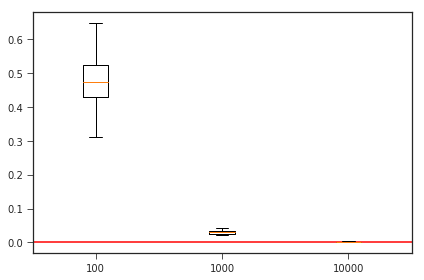

In [15]:
# plt.boxplot(list(errors['knn_4h'].values()), positions=np.arange(9)-0.1, widths=0.2, showfliers=False)

plt.boxplot(list(errors3['knn10'].values()), positions=np.arange(3), widths=0.2, showfliers=False)
plt.xticks(np.arange(3), ns)
plt.hlines(0, -1, 9, color='red')
plt.tight_layout()
plt.savefig('output/box-gaussian-3.pdf', format='pdf')